# KMeans_DirectMarketing
### To create segments (Cluster Profiles) using KMeans clustering

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data_dir="E:\GitHub\Python\KMeans"

In [7]:
os.chdir(data_dir)

In [9]:
os.getcwd()

'E:\\GitHub\\Python\\KMeans'

In [11]:
dm=pd.read_csv("DirectMarketing.csv", sep=',', header=0)
dm.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [12]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Age            1000 non-null object
Gender         1000 non-null object
OwnHome        1000 non-null object
Married        1000 non-null object
Location       1000 non-null object
Salary         1000 non-null int64
Children       1000 non-null int64
History        697 non-null object
Catalogs       1000 non-null int64
AmountSpent    1000 non-null int64
Cust_Id        1000 non-null int64
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


### Checking the Missing Values

In [13]:
dm.isnull().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
Cust_Id          0
dtype: int64

### Create separate category 'Missing' for History

In [15]:
dm["History"]= dm.History.replace({np.nan:"Missing"})
print(dm.History.unique())
print(dm.isnull().sum())
dm.head()

['High' 'Low' 'Medium' 'Missing']
Age            0
Gender         0
OwnHome        0
Married        0
Location       0
Salary         0
Children       0
History        0
Catalogs       0
AmountSpent    0
Cust_Id        0
dtype: int64


,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [17]:
dm.dtypes

Age            object
Gender         object
OwnHome        object
Married        object
Location       object
Salary          int64
Children        int64
History        object
Catalogs        int64
AmountSpent     int64
Cust_Id         int64
dtype: object

### Data used to build KMeans models should always be "Numeric" & "Be on same scale"
### Convert Non-Numeric variables in to Numeric

In [18]:
data_num= pd.get_dummies(dm)
data_num.head()
pd.DataFrame(data_num.columns)

,0
0,Salary
1,Children
2,Catalogs
3,AmountSpent
4,Cust_Id
5,Age_Middle
6,Age_Old
7,Age_Young
8,Gender_Female
9,Gender_Male


### In order to create clusters, consider the following variables.,
### Salary, Married, Location, History, AmountSpent

In [19]:
data_num2= data_num.iloc[:, np.r_[0,3,12:19]]
data_num2.head()

,Salary,AmountSpent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium
0,47500,755,0,1,0,1,1,0,0
1,63600,1318,0,1,1,0,1,0,0
2,13500,296,0,1,1,0,0,1,0
3,85600,2436,1,0,1,0,1,0,0
4,68400,1304,0,1,1,0,1,0,0


### Scale the data, Using pandas

In [20]:
def scale(x):
    return (x-np.mean(x))/np.std(x)
data_scaled= data_num2.apply(scale,axis=0)

In [21]:
data_scaled.head()

,Salary,AmountSpent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium
0,-0.281164,-0.480716,-1.004008,1.004008,-1.564697,1.564697,1.709260,-0.546536,-0.518686
1,0.244963,0.105383,-1.004008,1.004008,0.639101,-0.639101,1.709260,-0.546536,-0.518686
2,-1.392239,-0.958548,-1.004008,1.004008,0.639101,-0.639101,-0.585049,1.829707,-0.518686
3,0.963893,1.269254,0.996008,-0.996008,0.639101,-0.639101,1.709260,-0.546536,-0.518686
4,0.401820,0.090809,-1.004008,1.004008,0.639101,-0.639101,1.709260,-0.546536,-0.518686


### Scale the data using sklearn

In [34]:
import sklearn.preprocessing as preprocessing
dat_scaled= preprocessing.scale(data_num2,axis=0)

In [35]:
print(data_scaled)
print("Type Of Output Is" +str(type(dat_scaled)))
print("Shape Of The Object Is" +str(dat_scaled.shape))

[[-0.28116399 -0.480716   -1.00400803 ...  1.70925967 -0.54653573
  -0.51868635]
 [ 0.24496256  0.10538337 -1.00400803 ...  1.70925967 -0.54653573
  -0.51868635]
 [-1.39223869 -0.95854835 -1.00400803 ... -0.58504861  1.82970656
  -0.51868635]
 ...
 [-0.36939639  0.20844525 -1.00400803 ... -0.58504861 -0.54653573
   1.92794739]
 [ 0.74821404 -0.56816244  0.99600797 ... -0.58504861 -0.54653573
   1.92794739]
 [-0.08182412 -0.25377166  0.99600797 ... -0.58504861 -0.54653573
   1.92794739]]
Type Of Output Is<class 'numpy.ndarray'>
Shape Of The Object Is(1000, 9)


### Create a cluster model

In [36]:
import sklearn.cluster as cluster

In [37]:
kmeans= cluster.KMeans(n_clusters=3, init="k-means++")
kmeans=kmeans.fit(dat_scaled)

In [38]:
kmeans.labels_

array([1, 0, 0, 2, 0, 2, 0, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 0, 0, 0, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 2, 1, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 2,
       0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 2, 1, 2, 0, 2, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 1, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 0,
       0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 1, 1, 2, 0, 2, 1, 0, 1, 0, 0, 2,
       2, 0, 2, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 2, 1, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 0, 0,
       1, 0, 0, 0, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0, 2,

In [39]:
kmeans.cluster_centers_

array([[-0.7365384 , -0.57050251, -0.99969765,  0.99969765,  0.11189975,
        -0.11189975, -0.49110064,  0.37016119,  0.00333248],
       [ 0.50728646,  1.01391679,  0.60494339, -0.60494339, -1.56469673,
         1.56469673,  0.88894833, -0.50671044, -0.2589878 ],
       [ 0.7029399 ,  0.23311502,  0.99600797, -0.99600797,  0.63910148,
        -0.63910148,  0.19257408, -0.22704096,  0.12552533]])

### Elbow Method

In [41]:
from scipy.spatial.distance import cdist
K=range(1,20)
wss= []
for k in K:
    kmeans= cluster.KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(dat_scaled)
    wss.append(sum(np.min(cdist(dat_scaled, kmeans.cluster_centers_, "euclidean"),
                         axis=1))/dat_scaled.shape[0])

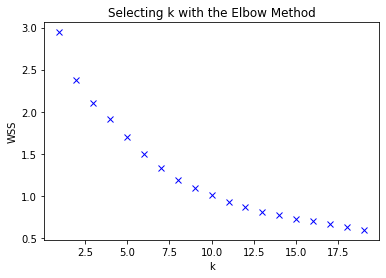

In [43]:
plt.plot(K, wss, "bx")
plt.xlabel("k")
plt.ylabel("WSS")
plt.title("Selecting k with the Elbow Method")
plt.show()

In [45]:
import sklearn.metrics as metrics
labels= cluster.KMeans(n_clusters=10, random_state=200).fit(dat_scaled).labels_

In [46]:
metrics.silhouette_score(dat_scaled,labels,metric="euclidean",random_state=200)

0.5399276390008566

In [52]:
for i in range(10,16):
    labels= cluster.KMeans(n_clusters=i, random_state=200).fit(data_scaled).labels_
    print("Silhouette Score for K= " +str(i)+ " is " +str(metrics.silhouette_score(dat_scaled,labels,metric= "euclidean",
                                                                              random_state=200)))

Silhouette Score for K= 10 is 0.5399276390008566
Silhouette Score for K= 11 is 0.563758763648046
Silhouette Score for K= 12 is 0.5782957267164003
Silhouette Score for K= 13 is 0.6056162256396024
Silhouette Score for K= 14 is 0.6109391237794385
Silhouette Score for K= 15 is 0.609058252993475


### k=14 is the optimum no. of clusters

In [55]:
import cluster_profiles as cluster_profiles
kmeans= cluster.KMeans(n_clusters=14, random_state=200).fit(dat_scaled)

In [56]:
cluster_profiles.get_zprofiles(data=data_num2.copy(),kmeans=kmeans)

,Salary,AmountSpent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium,Size
Labels,,,,,,,,,,
0,0.193114,-0.826009,0.995510,-0.995510,0.638782,-0.638782,-0.584756,1.828791,-0.518427,49
1,0.280950,0.426732,-1.003506,1.003506,0.638782,-0.638782,0.625523,-0.546262,-0.518427,36
2,0.716950,0.604730,0.995510,-0.995510,0.638782,-0.638782,-0.584756,-0.546262,-0.518427,94
3,-0.967005,-0.930908,-1.003506,1.003506,0.638782,-0.638782,-0.584756,1.828791,-0.518427,135
4,-0.577404,-0.227593,-1.003506,1.003506,-1.563914,1.563914,-0.584756,-0.546262,1.926983,27
5,0.978603,1.645041,0.995510,-0.995510,-1.563914,1.563914,1.655076,-0.546262,-0.518427,86
6,0.342410,-0.304641,0.995510,-0.995510,0.638782,-0.638782,-0.584756,-0.546262,1.926983,94
7,-0.821839,-0.470487,-1.003506,1.003506,-1.563914,1.563914,-0.584756,-0.546262,-0.518427,45
8,1.159331,0.779150,0.995510,-0.995510,0.638782,-0.638782,1.708405,-0.546262,-0.518427,121


# Interpretation
### Observe the 5th-Label,  Customers who are Married, have High History of spending(+ve), have higher salary than average and are staying far from a retail store are likely to spend more on the Direct Marketer.